<a href="https://colab.research.google.com/github/aynaval/nyc-taxi-trip-duration-predicton/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 36)
plt.style.use('seaborn')

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15
plt.rcParams['figure.figsize'] = [16, 10]
from geopy.distance import great_circle



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/NYC Taxi Trip Time Prediction - Lavanya M/Copy of NYC Taxi Data.csv')

# **EDA**

In [4]:
# !pip install pandas-profiling==2.7.1
# from pandas_profiling import ProfileReport
# prof = ProfileReport(data)
# prof.to_file(output_file='output.html')

In [5]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [7]:
data.sample(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
925067,id3095751,1,2016-04-10 16:06:42,2016-04-10 16:23:02,1,-73.994011,40.751122,-73.968590,40.760887,N,980
738956,id3209166,1,2016-03-31 07:57:08,2016-03-31 07:59:37,1,-73.978363,40.737301,-73.974831,40.741886,N,149
121943,id2153376,1,2016-03-31 00:37:25,2016-03-31 00:48:42,1,-73.992470,40.714916,-73.997467,40.746601,N,677


In [8]:
data.shape

(1458644, 11)

In [9]:
data.size

16045084

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [11]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


* Minimum value of trip duration is 1 secound and max is 3526282 (approx 40 days).


In [12]:
data.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [13]:
#sns.heatmap(data.isnull());

* There are no missing values in the data.

In [14]:
data.duplicated().value_counts()

False    1458644
dtype: int64

* There are no duplicate values.

## **Distribution**

### Categorical columns

In [15]:
#sns.countplot(data=data,x='vendor_id');


* There is almost equal ratio of both vendors.

In [16]:
#sns.countplot(data=data,x='store_and_fwd_flag');


* Only few records were recored in memory before sharing(Y).

### Numerical columns

In [17]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [18]:
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [19]:
print(data['pickup_datetime'].dt.year.unique(),data['dropoff_datetime'].dt.year.unique())

[2016] [2016]


In [20]:
(data['pickup_datetime'].dt.month.unique(),data['dropoff_datetime'].dt.month.unique())

(array([3, 6, 1, 4, 5, 2]), array([3, 6, 1, 4, 5, 2, 7]))

In [21]:
(data[data['dropoff_datetime'].dt.month==7]['trip_duration']//60).value_counts(sort=True)

11    7
9     6
18    6
7     5
12    5
     ..
44    1
43    1
39    1
36    1
4     1
Name: trip_duration, Length: 63, dtype: int64

In [22]:
(data[data['dropoff_datetime'].dt.month==7]['trip_duration']//3600).value_counts()

0     109
23     12
1       6
Name: trip_duration, dtype: int64

In [23]:
((data['dropoff_datetime']-data['pickup_datetime']).dt.total_seconds().astype(int) == data['trip_duration']).value_counts() 

True    1458644
dtype: int64

* Drop off column can be dropped as (drop off - pick up) = trip duration.

In [24]:
data.drop('dropoff_datetime',axis =1,inplace= True)

In [25]:
# n =1;
# for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
#   plt.subplot(2,2,n)
#   sns.boxplot(data[i])
#   n+=1

* city_long_border = (-74.03, -73.75)
* city_lat_border = (40.63, 40.85)



In [26]:
# dropping outliers
data = data[data['pickup_longitude'] <= -73.75]
data = data[data['pickup_longitude'] >= -74.03]
data = data[data['pickup_latitude'] <= 40.85]
data = data[data['pickup_latitude'] >= 40.63]
data = data[data['dropoff_longitude'] <= -73.75]
data = data[data['dropoff_longitude'] >= -74.03]
data = data[data['dropoff_latitude'] <= 40.85]
data = data[data['dropoff_latitude'] >= 40.63]

In [27]:
# sns.boxplot(data['trip_duration']);

In [28]:
data['trip_duration'].describe()

count    1.439183e+06
mean     9.462307e+02
std      5.251643e+03
min      1.000000e+00
25%      3.940000e+02
50%      6.560000e+02
75%      1.059000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

* Min values is 1 and max is 352682.
* Using 2 standared deviation after taking log of trip duration.

In [29]:
# sns.histplot(data['trip_duration'],bins = 100)
# plt.title('skew :'+str(data['trip_duration'].skew()))
# plt.ticklabel_format(style='plain')


In [30]:
# sns.histplot(np.log(data['trip_duration']),bins=100);
# plt.title('skew :'+str(np.log(data['trip_duration']).skew()));

In [31]:
data['log_trip_duration']= np.log(data['trip_duration'])

In [32]:
data.shape

(1439183, 11)

In [33]:
data['log_trip_duration'].mean()- 3*data['log_trip_duration'].std()

4.079470599400638

In [34]:
data = data[data['log_trip_duration']>(data['log_trip_duration'].mean()- 3*data['log_trip_duration'].std())]
data = data[data['log_trip_duration']<(data['log_trip_duration'].mean()+ 3*data['log_trip_duration'].std())]


In [35]:
data['month'] = data['pickup_datetime'].dt.month_name()

In [36]:
data['day_no'] = data['pickup_datetime'].dt.day

In [37]:
data['day'] = data['pickup_datetime'].dt.day_name()

In [38]:
# sns.barplot(data=data,x='month',y='trip_duration')

* All months have equal distribution.

In [39]:
# sns.barplot(data=data,x='day_no',y='trip_duration' )

* There are equal number of all days.

In [40]:
# sns.barplot(data=data,x='day',y='trip_duration')

In [41]:
data['hour'] = data['pickup_datetime'].dt.hour

In [42]:
data['minute'] = data['pickup_datetime'].dt.minute

In [43]:
data['second'] = data['pickup_datetime'].dt.second

In [44]:
# sns.boxplot(data=data,x='day',y='trip_duration')

In [45]:
# sns.boxplot(data=data,x='month',y='trip_duration',hue='day')

In [46]:
# sns.boxplot(data=data,x='day_no',y='trip_duration')

In [47]:
# sns.barplot(data=data,x='hour',y='trip_duration',hue='month')

In [48]:
# sns.barplot(data=data,x='hour',y='trip_duration',hue='day')

In [49]:
# sns.barplot(data=data,x='passenger_count',y='trip_duration',hue='day')

In [50]:
 data = data[data['passenger_count']>0]

In [51]:
def distancer(row):
    coords_1 = (row['pickup_latitude'], row['pickup_longitude'])
    coords_2 = (row['dropoff_latitude'], row['dropoff_longitude'])
    return great_circle(coords_1, coords_2).km

data['pickup_dropoff_distance'] = data.apply(distancer, axis=1)

In [52]:
# sns.lineplot(data=data,y='pickup_dropoff_distance',x='hour')

In [53]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].map(dict(N=0,Y=1))

In [54]:
data = pd.get_dummies(data ,columns= ['month','day'],drop_first=True)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428683 entries, 0 to 1458643
Data columns (total 27 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   id                       1428683 non-null  object        
 1   vendor_id                1428683 non-null  int64         
 2   pickup_datetime          1428683 non-null  datetime64[ns]
 3   passenger_count          1428683 non-null  int64         
 4   pickup_longitude         1428683 non-null  float64       
 5   pickup_latitude          1428683 non-null  float64       
 6   dropoff_longitude        1428683 non-null  float64       
 7   dropoff_latitude         1428683 non-null  float64       
 8   store_and_fwd_flag       1428683 non-null  int64         
 9   trip_duration            1428683 non-null  int64         
 10  log_trip_duration        1428683 non-null  float64       
 11  day_no                   1428683 non-null  int64         
 12  

In [56]:
data.drop(['id','pickup_datetime','trip_duration'],axis=1,inplace=True)

In [57]:
# sns.heatmap(data.corr(),annot=True)

In [58]:
# ! pip install sweetviz

In [59]:
# import sweetviz as sv
# #You could specify which variable in your dataset is the target for your model creation. We can specify it using the target_feat parameter.
# my_report = sv.analyze(data, target_feat ='log_trip_duration')
# my_report.show_html()

In [60]:
!pip install pycaret

In [61]:
from pycaret.regression import * 

In [62]:
exp_reg101 = setup(data = data, target='log_trip_duration',categorical_features =['month_February', 'month_January','month_June', 'month_March', 'month_May', 'day_Monday', 'day_Saturday','day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday','vendor_id', 'passenger_count','store_and_fwd_flag'])

,Description,Value
0,session_id,7374
1,Target,log_trip_duration
2,Original Data,"(1428683, 24)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,14
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1000078, 28)"


In [63]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2611,0.1236,0.3516,0.7643,0.0494,0.0419
1,0.2592,0.1220,0.3493,0.7672,0.0491,0.0416
2,0.2590,0.1220,0.3493,0.7662,0.0491,0.0416
3,0.2592,0.1218,0.3490,0.7686,0.0490,0.0416
4,0.2573,0.1202,0.3467,0.7687,0.0486,0.0413
5,0.2604,0.1229,0.3505,0.7652,0.0492,0.0418
6,0.2584,0.1207,0.3474,0.7682,0.0488,0.0415
7,0.2606,0.1229,0.3505,0.7646,0.0493,0.0419
8,0.2591,0.1220,0.3493,0.7653,0.0490,0.0415
9,0.2591,0.1223,0.3497,0.7676,0.0491,0.0416


In [78]:
tuned_gbr = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2443,0.1102,0.3320,0.7908,0.0467,0.0392
1,0.2435,0.1097,0.3312,0.7882,0.0466,0.0391
2,0.2447,0.1109,0.3330,0.7868,0.0468,0.0393
3,0.2440,0.1099,0.3316,0.7896,0.0467,0.0393
4,0.2435,0.1097,0.3312,0.7911,0.0466,0.0391
5,0.2442,0.1099,0.3315,0.7889,0.0466,0.0392
6,0.2428,0.1094,0.3308,0.7894,0.0465,0.0390
7,0.2429,0.1093,0.3306,0.7924,0.0465,0.0390
8,0.2441,0.1104,0.3322,0.7900,0.0467,0.0392
9,0.2437,0.1101,0.3319,0.7915,0.0468,0.0392


In [65]:
# dt = create_model('dt')

In [66]:
# plot_model(tuned_gbr, plot = 'feature')

In [67]:
data_clean = data.copy()

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler = MinMaxScaler()

In [70]:
data_clean[['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude']]= scaler.fit_transform(data_clean[['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude']])

In [71]:
exp_reg102 = setup(data = data_clean, target='log_trip_duration',categorical_features =['month_February', 'month_January','month_June', 'month_March', 'month_May', 'day_Monday', 'day_Saturday','day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday','vendor_id', 'passenger_count','store_and_fwd_flag'])

,Description,Value
0,session_id,1135
1,Target,log_trip_duration
2,Original Data,"(1428683, 24)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,14
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1000078, 28)"


In [72]:
lightgbm_clean = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2599,0.1222,0.3496,0.7680,0.0491,0.0417
1,0.2589,0.1214,0.3484,0.7656,0.0489,0.0415
2,0.2600,0.1226,0.3501,0.7642,0.0491,0.0417
3,0.2582,0.1209,0.3477,0.7686,0.0489,0.0415
4,0.2591,0.1219,0.3492,0.7677,0.0490,0.0416
5,0.2581,0.1211,0.3480,0.7675,0.0488,0.0414
6,0.2595,0.1223,0.3498,0.7644,0.0491,0.0416
7,0.2591,0.1218,0.3490,0.7686,0.0490,0.0416
8,0.2582,0.1214,0.3485,0.7690,0.0489,0.0414
9,0.2597,0.1224,0.3499,0.7682,0.0492,0.0417


In [77]:
tuned_gbr_clean = tune_model(lightgbm_clean)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2432,0.1096,0.3310,0.7920,0.0466,0.0391
1,0.2433,0.1096,0.3310,0.7884,0.0466,0.0391
2,0.2429,0.1098,0.3313,0.7888,0.0466,0.0390
3,0.2426,0.1089,0.3300,0.7916,0.0465,0.0390
4,0.2437,0.1102,0.3319,0.7901,0.0467,0.0391
5,0.2427,0.1089,0.3299,0.7909,0.0464,0.0390
6,0.2432,0.1098,0.3313,0.7887,0.0466,0.0390
7,0.2434,0.1098,0.3313,0.7914,0.0466,0.0391
8,0.2429,0.1096,0.3310,0.7916,0.0465,0.0390
9,0.2435,0.1098,0.3314,0.7921,0.0467,0.0392


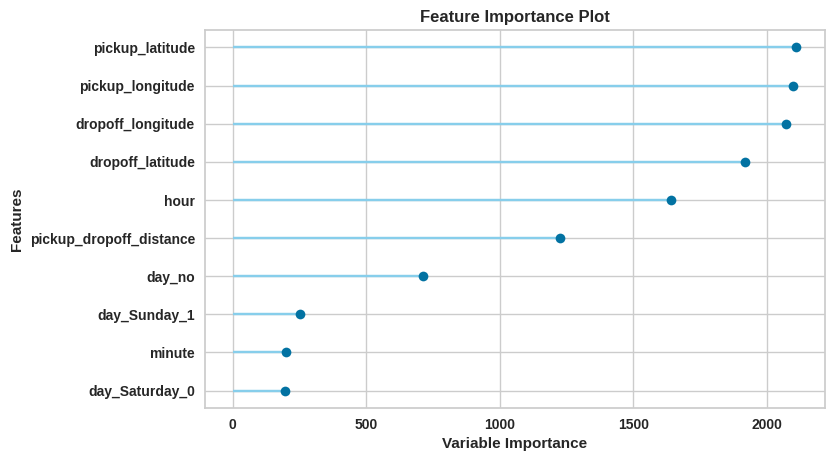

In [75]:
plot_model(tuned_gbr, plot = 'feature')

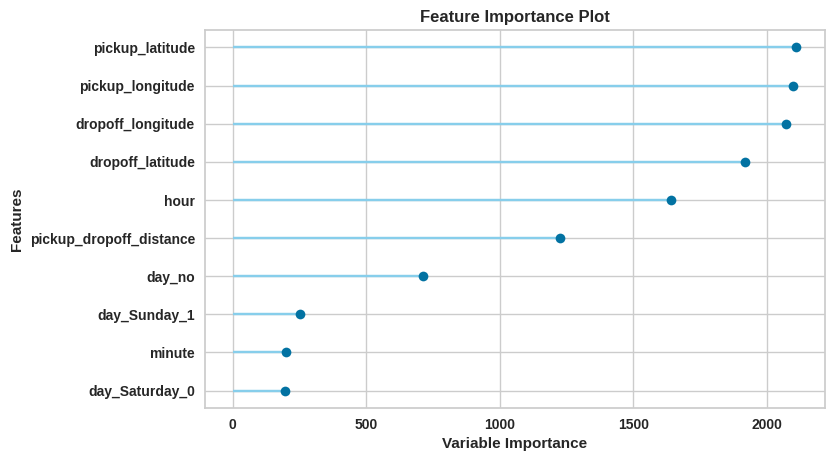

In [79]:
plot_model(tuned_gbr_clean, plot = 'feature')